In [1]:
### Using Python and some graphing libraries, you can project the total number of confirmed cases of COVID-19, and also display the total number of deaths for a country (this code uses Rwanda as an example) on a given date. Humans sometimes need help interpreting and processing the meaning of data, so this article also demonstrates how to create an animated horizontal bar graph for five countries, showing the variation of cases by date.

In [2]:
# Set Up environement, please uncomment these lines to install first the packages

# pip install pycountry
# pip install plotly
# pip install ffmpeg-python
# Use this global installation in case you get ffmpeg work: sudo apt install ffmpeg


In [3]:
####  Projecting confirmed cases and deaths for Senegal


           Date  Country  Confirmed  Recovered  Deaths
148  2020-01-22  Senegal          0          0       0
336  2020-01-23  Senegal          0          0       0
524  2020-01-24  Senegal          0          0       0


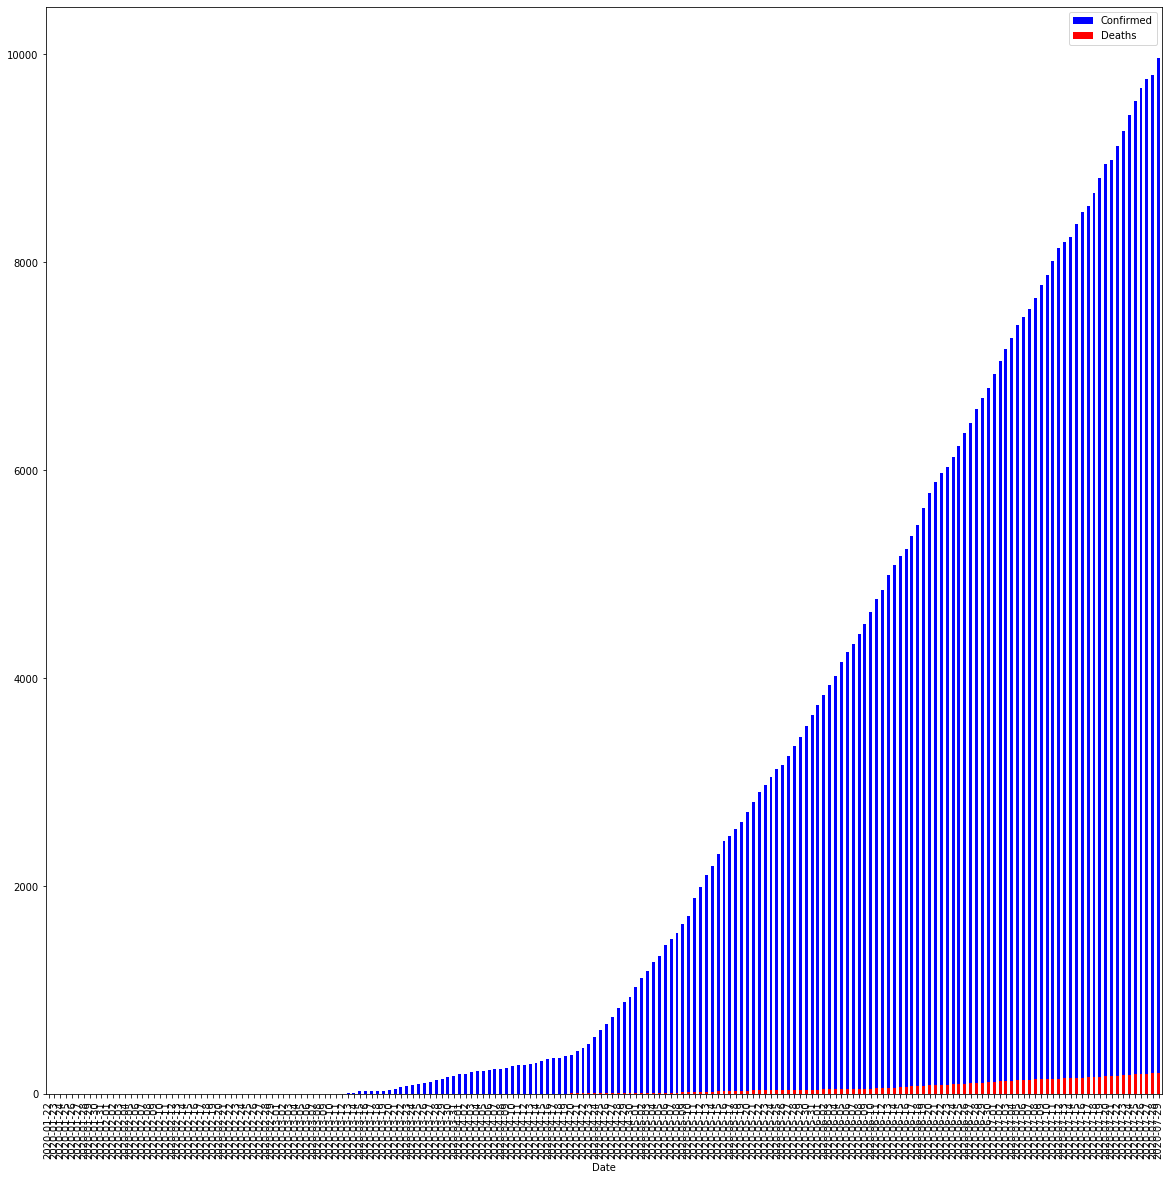

In [4]:
#  Author:- Hubert Kanyamahanga # email:- hubakanye20@gmail.com
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#### ----- Step 1 (Download data)----
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head(3))  # Uncomment to see the dataframe

#### ----- Step 2 (Select data for Senegal)----
df_senegal = df1[df1['Country'] == 'Senegal']
print(df_senegal.head(3))

#### ----- Step 3 (Plot data)----
# Increase size of plot
plt.rcParams["figure.figsize"]=20,20  # Remove if not on Jupyter
# Plot column 'Confirmed'
df_senegal.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')

ax1 = plt.gca() # 'gca' stands for 'get current axis
df_senegal.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = ax1)
plt.show()

In [5]:
### Creating an animated horizontal bar graph for five countries

<IPython.core.display.Javascript object>


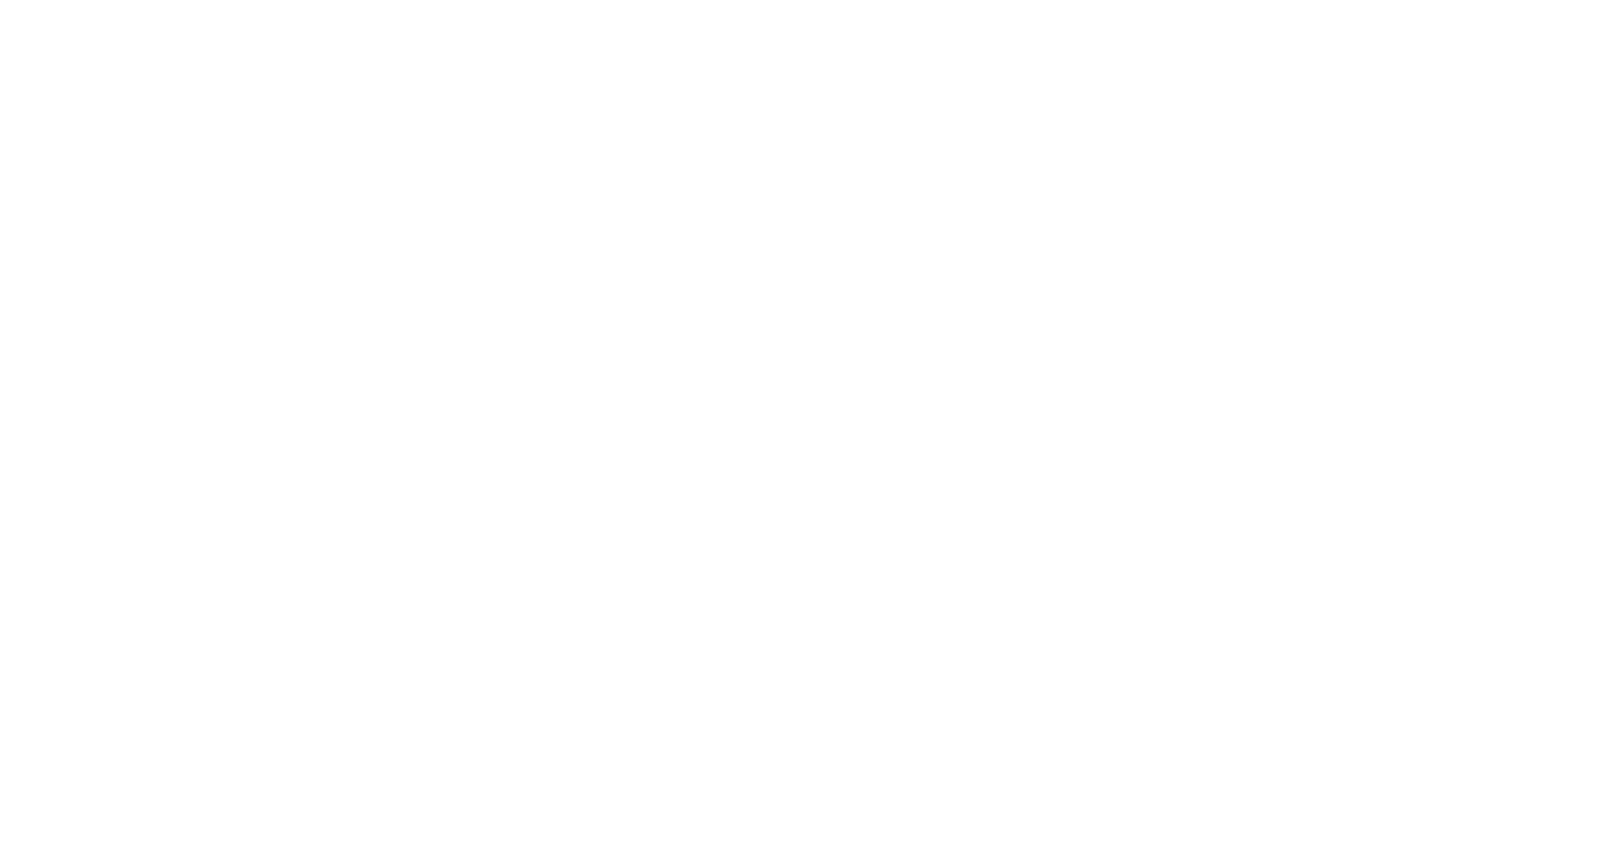

<IPython.core.display.Javascript object>


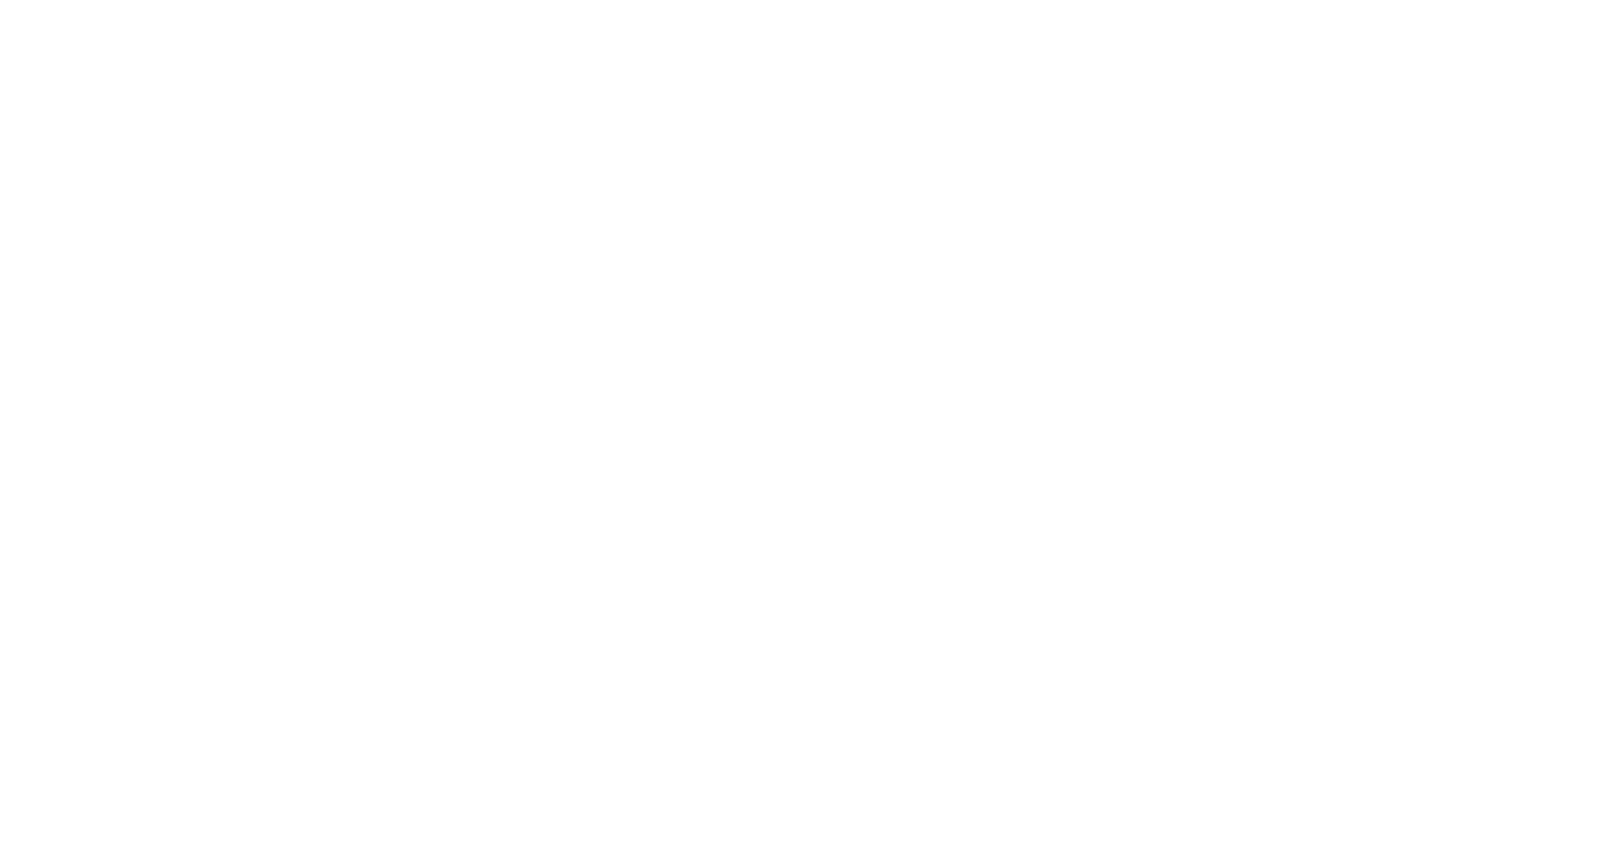

Traceback (most recent call last):
  File "/home/hubert/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/hubert/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [6]:
%matplotlib notebook
#  Author:- Anurag Gupta # email:- 999.anuraggupta@gmail.com
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from time import sleep

#### ---- Step 1:- Download data
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(URL_DATASET, usecols = ['Date', 'Country', 'Confirmed'])
# print(df.head(3)) # uncomment this to see output

#### ---- Step 2:- Create list of all dates
list_dates = df['Date'].unique()
# print(list_dates) # Uncomment to see the dates

#### --- Step 3:- Pick 5 countries. Also create ax object
fig, ax = plt.subplots(figsize=(15, 8))

# We will animate for these 5 countries only
list_countries = ['South Africa', 'Egypt', 'Marocco', 'Nigeria', 'Senegal']
# colors for the 5 horizontal bars
list_colors = ['black', 'red', 'green', 'blue', 'yellow']

### --- Step 4:- Write the call back function
# plot_bar() is the call back function used in FuncAnimation class object
def plot_bar(some_date):
    df2 = df[df['Date'].eq(some_date)]
    ax.clear()
    # Only take Confirmed column in descending order
    df3 = df2.sort_values(by = 'Confirmed', ascending = False)
    # Select the top 5 Confirmed countries
    df4 = df3[df3['Country'].isin(list_countries)]
    # print(df4)  # Uncomment to see that dat is only for 5 countries
    sleep(0.2)  # To slow down the animation
    # ax.barh() makes a horizontal bar plot.
    return ax.barh(df4['Country'], df4['Confirmed'], color= list_colors)

###----Step 5:- Create FuncAnimation object---------
my_anim = animation.FuncAnimation(fig = fig, func = plot_bar,
                    frames= list_dates, blit=True,
                    interval=20)

### --- Step 6:- Save the animation to an mp4
# Place where to save the mp4. Give your file path instead
path_mp4 = r'file:/home/hubert/Desktop/Machine-Learning/data/population_covid2.mp4'  
# my_anim.save(path_mp4, fps=30, extra_args=['-vcodec', 'libx264'])
my_anim.save(filename = path_mp4, writer = 'ffmpeg',
             fps=30,
             extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
plt.show()
